# Helper for mask maker for Met Office netCDF files

This notebook is intended to help draw masks for Met Office netCDF files (output from the UKV). I used (a much messier version of) this tool to make truth data before training a machine learning model to detect lee waves in vertical velocity model data.

In [1]:
from mask_maker import *

In [2]:
#filename = 'C:/Users/mm16jdc/Downloads/20211120T1200Z-PT0027H00M-height_of_orography.nc'#20210206T0900Z-PT0000H00M-wind_vertical_velocity_on_pressure_levels.nc'
filename = '../20210206T0900Z-PT0000H00M-wind_vertical_velocity_on_pressure_levels.nc'

In [3]:
get_variables(filename)#see what variables we have available

['upward_air_velocity',
 'lambert_azimuthal_equal_area',
 'pressure',
 'projection_y_coordinate',
 'projection_y_coordinate_bnds',
 'projection_x_coordinate',
 'projection_x_coordinate_bnds',
 'forecast_period',
 'forecast_reference_time',
 'time']

In [4]:
data = load_xarray(filename,'upward_air_velocity')[8,250:762,275:787]#height,ycoords,xcoords
proj = get_proj(filename)

In [5]:
check_data(data)#check data is 2D

Dimensions of DataArray is 2D. Go wild.


<IPython.core.display.Javascript object>


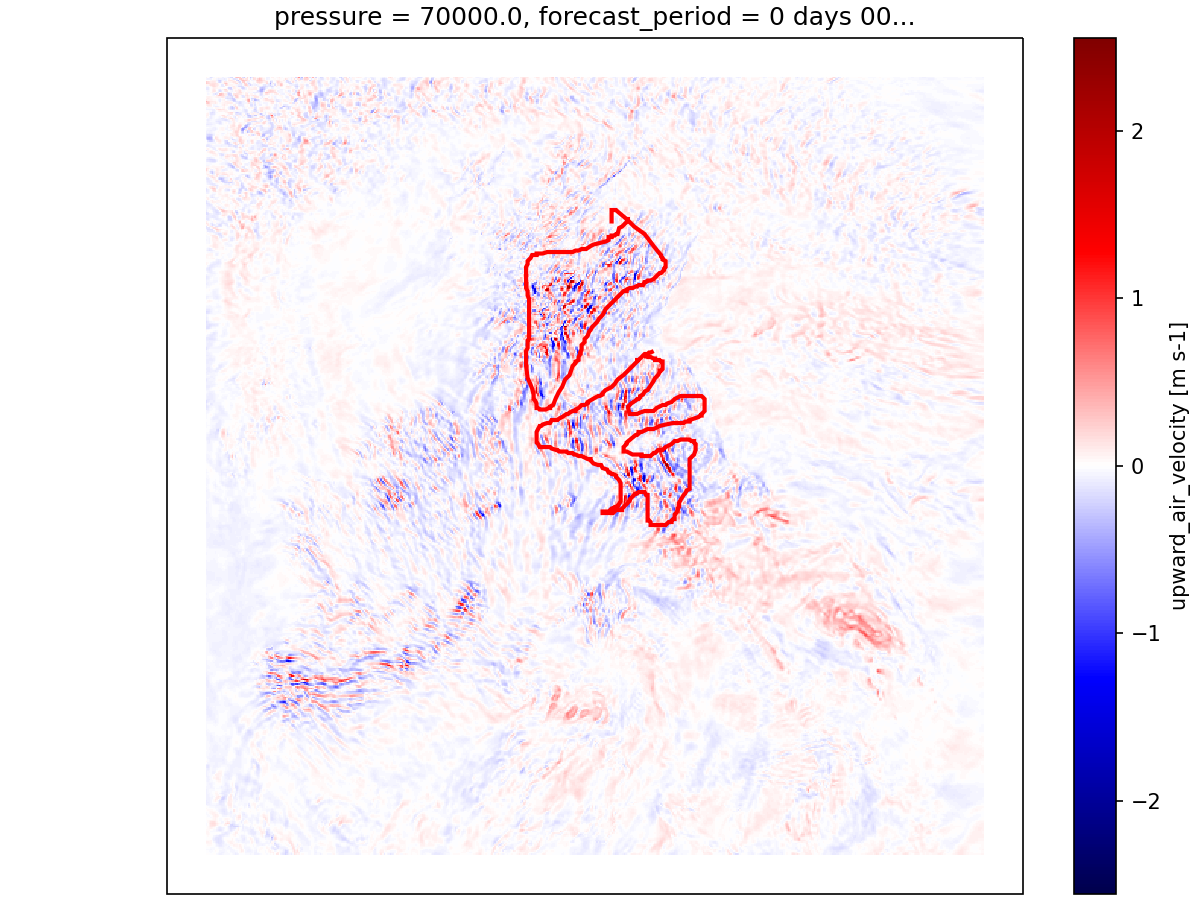

In [11]:
#Draw lasso on generated plot first

%matplotlib notebook
if __name__ == '__main__':

    fig = plt.figure(figsize=(8,6),constrained_layout=True)
    ax1 = fig.add_subplot(111,projection=proj)
    ax1.set_title('lasso selection:')
    #ax1.coastlines(resolution='10m',alpha=0.25)
    p = data.plot.pcolormesh(
        #rasterized = True,
        cmap='seismic',
        #vmin=-4,vmax=4,
        robust=False,
        ax=ax1
    )
    lman = LassoManager(ax1, data)

    plt.show()

In [12]:
#Once happy, run this block to create mask. Mask can then be saved using np.save, for example.
mask = mask_create(data,proj,lman)
np.save('example.npy',mask)
dataset = combine_data_and_mask(data,mask)

<IPython.core.display.Javascript object>


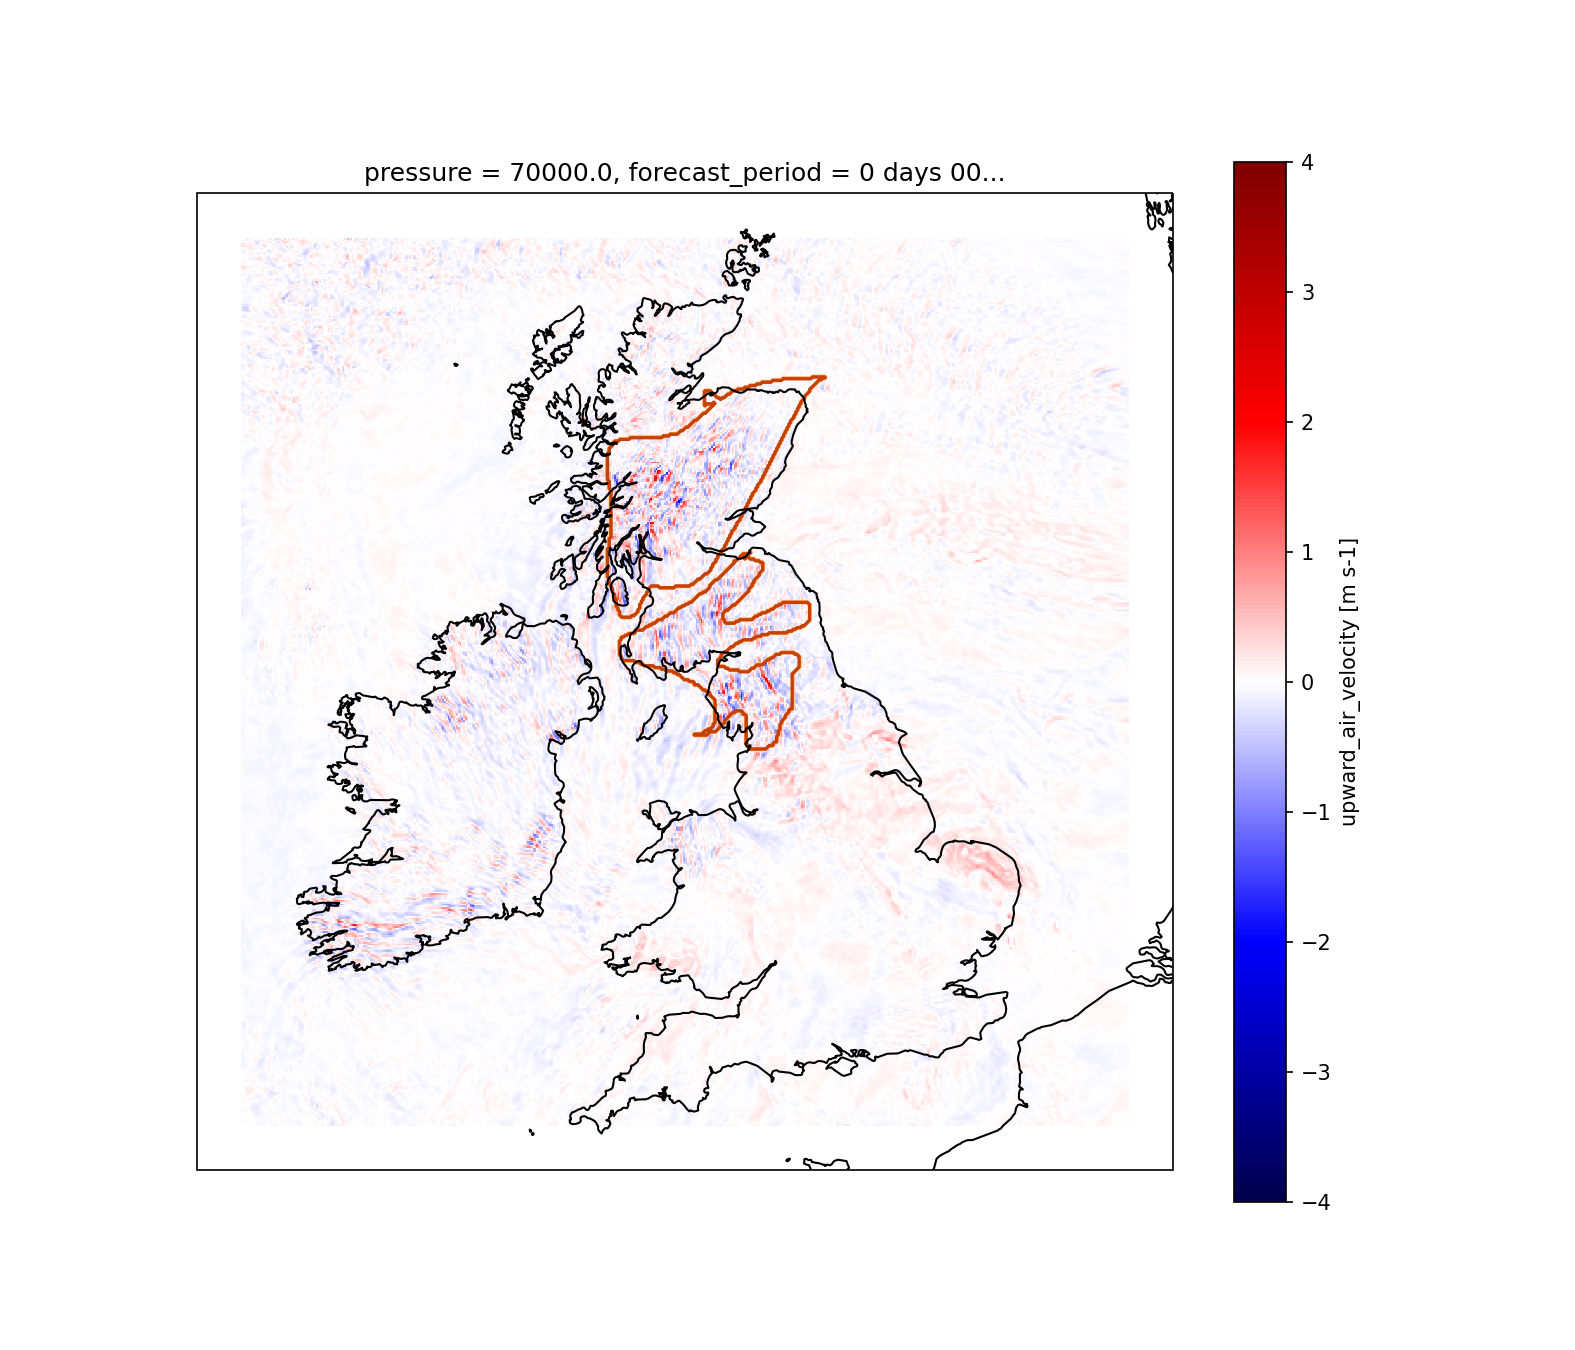

In [13]:
#show our data and mask together.
plot_dataset(dataset,proj)

In [15]:
a = np.load('example.npy')
plt.imshow(a)

<IPython.core.display.Javascript object>


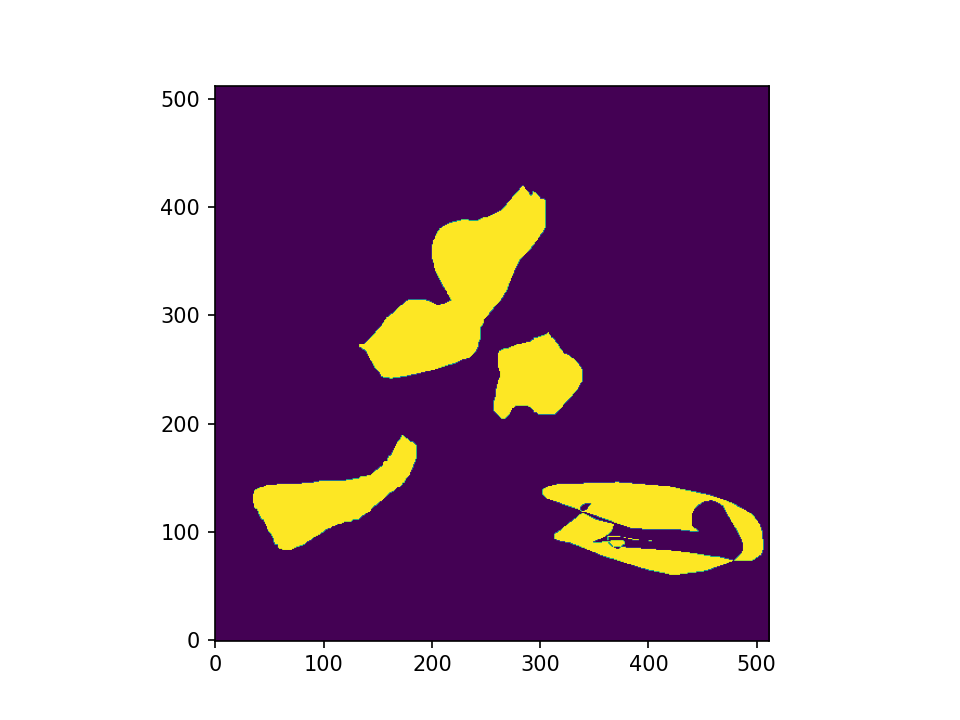

In [16]:
fig = plt.figure()
plt.imshow(a,origin='lower')